Imports

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
import pickle
import time

import sys
sys.stdout = open('output_of_LR_fasttext.txt','a')

#### Load data

In [67]:
X = np.load('../data/X_fasttext_embeddings.npy') 
y = np.load('../data/y_binarized.npy') 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
#creating a validation set for hyperparameter tuning
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)


Tags for plotting

In [68]:
tags = np.load('../data/y_tags.npy', allow_pickle=True)

# Logistic Regression

LR multiple binary classifiers

In [69]:
def train_LR(class_wt=None, name=None):
    LR_model_list = []
    for i in range(y_train.shape[1]):
        sample_y_train = y_train[:, i]
        LR_clf_single = LogisticRegression(n_jobs=-1, C=0.01, solver='newton-cg', class_weight=class_wt)
        LR_clf_single.fit(X_train, sample_y_train)
        LR_model_list.append(LR_clf_single)
    with open(name, 'wb') as f:
        pickle.dump(LR_model_list, f)
    return LR_model_list

    

In [70]:
def pred_LR(model, x_data):
    return model.predict(x_data)

In [71]:
def calc_scores(name, LR_model_list):
    precision_tr = []
    precision_v = []
    recall_tr = []
    recall_v = []
    f1_tr = []
    f1_v = []
    accu_tr = []
    accu_v = []
    
    for i in range(len(LR_model_list)):
        y_pred_tr = pred_LR(LR_model_list[i], X_train)
        y_pred_v = pred_LR(LR_model_list[i] ,(X_val))

        precision_tr.append(precision_score(y_pred=y_pred_tr, y_true=y_train[:,i]))
        precision_v.append(precision_score(y_pred=y_pred_v, y_true=y_val[:,i]))

        recall_tr.append(recall_score(y_pred=y_pred_tr, y_true=y_train[:,i]))
        recall_v.append(recall_score(y_pred=y_pred_v, y_true=y_val[:,i]))

        f1_tr.append(f1_score(y_pred=y_pred_tr, y_true=y_train[:,i]))
        f1_v.append(f1_score(y_pred=y_pred_v, y_true=y_val[:,i]))

        accu_tr.append(accuracy_score(y_pred=y_pred_tr, y_true=y_train[:,i]))
        accu_v.append(accuracy_score(y_pred=y_pred_v, y_true=y_val[:,i]))

    with open("../results/precision_C_tr_"+name+".txt", "w") as output:
        output.write(str(y_pred_tr))
    with open("../results/precision_C_v_"+name+".txt", "w") as output:
        output.write(str(y_pred_v))
    with open("../results/recall_C_tr"+name+".txt", "w") as output:
        output.write(str(recall_tr))
    with open("../results/recall_C_v"+name+".txt", "w") as output:
        output.write(str(recall_v))
    with open("../results/f1_C_tr"+name+".txt", "w") as output:
        output.write(str(f1_tr))
    with open("../results/f1_C_v"+name+".txt", "w") as output:
        output.write(str(f1_v))
    with open("../results/accu_C_tr"+name+".txt", "w") as output:
        output.write(str(accu_tr))
    with open("../results/accu_C_v"+name+".txt", "w") as output:
        output.write(str(accu_v))
    
    return precision_tr, precision_v, recall_tr, recall_v, f1_tr, f1_v, accu_tr, accu_v

In [72]:
def plotting_metrics(metric_list, name, tags=tags):
    disp_df = pd.DataFrame(
        {'tags': tags,
        'prec': metric_list
        })
    disp_df = disp_df.sort_values(by = 'prec' , ascending=False)

In [8]:
start_time = time.time()
LR_model_list = train_LR(class_wt=None, name='LR_cw_none_model_list_ft.pkl')
print('Execution time for LR with C=1, for fasttext embeddings',time.time()-start_time)


In [12]:
start_time = time.time()
LR_model_list_bal = train_LR(class_wt='balanced', name='LR_C_cw_bal_model_list_ft.pkl')
print('Execution time for LR with C=0.001, for fasttext embeddings',time.time()-start_time)

In [13]:
start_time = time.time()
LR_model_list_small = train_LR(class_wt={0:1,1:10},name='LR_cw_self_model_list_ft.pkl')
print('Execution time for LR with C=0.00001, for fasttext embeddings',time.time()-start_time)


In [73]:

LR_model_list_large = pickle.load(open('../models/LR_cw_none_model_list_ft.pkl', 'rb'))
LR_model_list_med = pickle.load(open('../models/LR_C_cw_bal_model_list_ft.pkl', 'rb'))
LR_model_list_small = pickle.load(open('../models/LR_cw_self_model_list_ft.pkl', 'rb'))

In [78]:
precision_C_large_tr, precision_C_large_v,recall_C_large_tr,recall_C_large_v, f1_C_large_tr, f1_C_large_v, accu_C_large_tr, accu_C_large_v = calc_scores('C_large',LR_model_list_large)
# accu_mean_C_large_tr = np.mean(accu_C_large_tr)
f1_mean_C_large_tr = np.mean(f1_C_large_tr)
accu_mean_C_large_tr = np.mean(accu_C_large_tr)
print("F1 mean for C=1: ", f1_mean_C_large_tr)
print("accuracy mean for C=1: ", accu_mean_C_large_tr)

/Users/siddhipotdar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/siddhipotdar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/siddhipotdar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/siddhipotdar/opt/anaconda3/lib/python3.9/site-packages

In [80]:
precision_C_med_tr, precision_C_med_v,recall_C_med_tr,recall_C_med_v, f1_C_med_tr, f1_C_med_v, accu_C_med_tr, accu_C_med_v = calc_scores('med',LR_model_list_med)
f1_mean_C_med_tr = np.mean(f1_C_med_tr)
accu_mean_C_med_tr = np.mean(accu_C_med_tr)
print("F1 mean for C=0.1: ", f1_mean_C_med_tr)
print("accuracy mean for C=0.1: ", accu_mean_C_med_tr)

In [81]:
precision_C_small_tr, precision_C_small_v,recall_C_small_tr,recall_C_small_v, f1_C_small_tr, f1_C_small_v, accu_C_small_tr, accu_C_small_v = calc_scores('small',LR_model_list_small)
f1_mean_C_small_tr = np.mean(f1_C_small_tr)
accu_mean_C_small_tr = np.mean(accu_C_small_tr)
print("F1 mean for C=0.01: ", f1_mean_C_small_tr)
print("accuracy mean for C=0.01: ", accu_mean_C_small_tr)

/Users/siddhipotdar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/siddhipotdar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/siddhipotdar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/siddhipotdar/opt/anaconda3/lib/python3.9/site-packages

Plot for train vs val accuracy

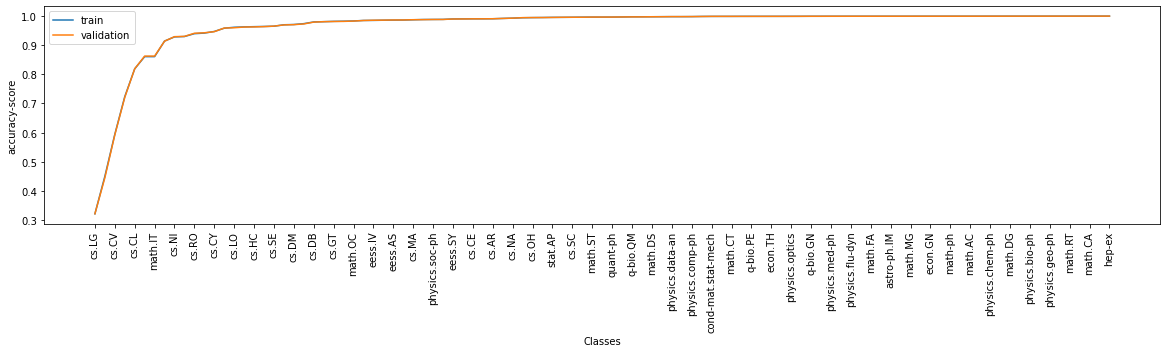

In [82]:
plt.close("all")
fig, ax = plt.subplots(figsize = (20, 4))
sorted_f1 = np.sort(accu_C_small_tr)
new_tags = tags[np.argsort(accu_C_small_tr)]
idx = np.arange(len(new_tags))
width = 0.5
ax.plot(sorted(accu_C_small_tr))
ax.plot(sorted(accu_C_small_v))

xticks_idx = idx[::2]

ax.set_xticks(xticks_idx)
ax.set_xticklabels([new_tags[x] for x in xticks_idx], rotation=90)
ax.set_ylabel("accuracy-score")
ax.set_xlabel("Classes")
ax.legend(['train', 'validation'])#plt.yscale("log")
plt.show()
fig.savefig("small_logreg_ft-plot.pdf", bbox_inches="tight")

min / max scores

In [26]:
precision_test = []
recall_test = []
f1_test = []
accu_test = []
for i in range(len(LR_model_list_small)):
    y_pred_test = pred_LR(LR_model_list_bal[i],X_test)
    precision_test.append(precision_score(y_pred=y_pred_test, y_true=y_test[:,i]))
    recall_test.append(recall_score(y_pred=y_pred_test, y_true=y_test[:,i]))
    f1_test.append(f1_score(y_pred=y_pred_test, y_true=y_test[:,i]))
    accu_test.append(accuracy_score(y_pred=y_pred_test, y_true=y_test[:,i]))
print("accuracy for test: ", np.mean(accu_test))
print("f1_test for test: ", np.mean(f1_test))

In [27]:
print("Minimum accuracy: ", min(accu_test))
print("Tag: ",tags[np.argmin(accu_test)])


In [28]:
print("Minimum accuracy: ", max(accu_test))
print("Tag: ",tags[np.argmax(accu_test)])

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
idx_good = np.where(tags=='cs.LG')[0][0]
idx_avg = np.where(tags=='cs.NE')[0][0]
idx_bad = np.where(tags=='cs.NA')[0][0]
print(idx_avg)
y_pred_v_good = LR_model_list_bal[idx_good].predict(X_test)
y_pred_v_avg = LR_model_list_bal[idx_avg].predict(X_test)
y_pred_v_bad = LR_model_list_bal[idx_bad].predict(X_test)

m_good = confusion_matrix(y_pred=y_pred_v_good, y_true=y_test[:,idx_good])
m_avg = confusion_matrix(y_pred=y_pred_v_avg, y_true=y_test[:,idx_avg])
m_bad = confusion_matrix(y_pred=y_pred_v_bad, y_true=y_test[:,idx_bad])


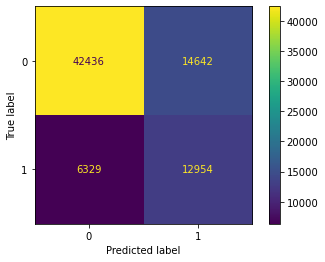

In [32]:
plt_good = ConfusionMatrixDisplay(m_good).plot()

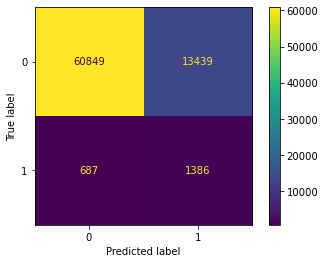

In [33]:
plt_avg = ConfusionMatrixDisplay(m_avg).plot()

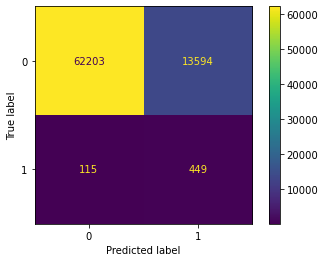

In [34]:
plt_bad = ConfusionMatrixDisplay(m_bad).plot()